In [455]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

import seaborn as sns

In [456]:
def read_files():
    xlsx = pd.ExcelFile('ArriendoVehiculos.xlsx')

    df_set_1 = pd.read_excel(xlsx, 'Set de Datos 1', engine='openpyxl', index_col=None)
    df_set_2 = pd.read_excel(xlsx, 'Set de Datos 2', engine='openpyxl', index_col=None)
    df_set_3 = pd.read_excel(xlsx, 'Set de Datos 3', engine='openpyxl', index_col=None)
    
    return df_set_1, df_set_2, df_set_3

In [457]:
df_set_1, df_set_2, df_set_3 = read_files()

In [458]:
def show_df_info(df):
    display(df.describe())

def graph_df(df, variable1, variable2):
    # Graph scatter plot of "MONTO" with seaborn
    
    # create 2 subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
    
    sns.set_theme(style="whitegrid")
    sns.scatterplot(data=df, y=variable1, x=df.index, hue="GÉNERO", ax=ax1)
    ax1.set_title(variable1 + " vs. " + "Index of the DF")
    
    # countplot for variable2
    sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
    sns.set_palette("blend:#7AB,#EDA")
    sns.countplot(data=df, y=variable2, order=df[variable2].value_counts().index , ax=ax2)
    ax2.set_title(variable2 + " counts")
    plt.show()
    


In [459]:
def transf_datos(df):
    encoder = LabelEncoder()
    
    df["enc_genero"] = encoder.fit_transform(df["GÉNERO"])   
    df["enc_act"] = encoder.fit_transform(df["ACTIVIDAD"])
    df["enc_marca"] = encoder.fit_transform(df["MARCA"])
    df["enc_modelo"] = encoder.fit_transform(df["MODELO"].apply(lambda x: str(x)))
    df["enc_comuna"] = encoder.fit_transform(df["COMUNA DE RESIDENCIA"])

    # Order the columns in a custom way
    
    df = df[["EDAD", "GÉNERO", "enc_genero", "ACTIVIDAD", "enc_act", "COMUNA DE RESIDENCIA", "enc_comuna", "MARCA", "enc_marca", "MODELO", "enc_modelo", "KILOMETRAJE INICIAL", "KILOMETRAJE FINAL","CANTIDAD DIAS" ,"MONTO"]]
    
    return df
    
    

In [460]:
# Rename column "Unnamed: 0" to "EDAD"
df_set_2.rename(columns={"Unnamed: 0": "EDAD"}, inplace=True)

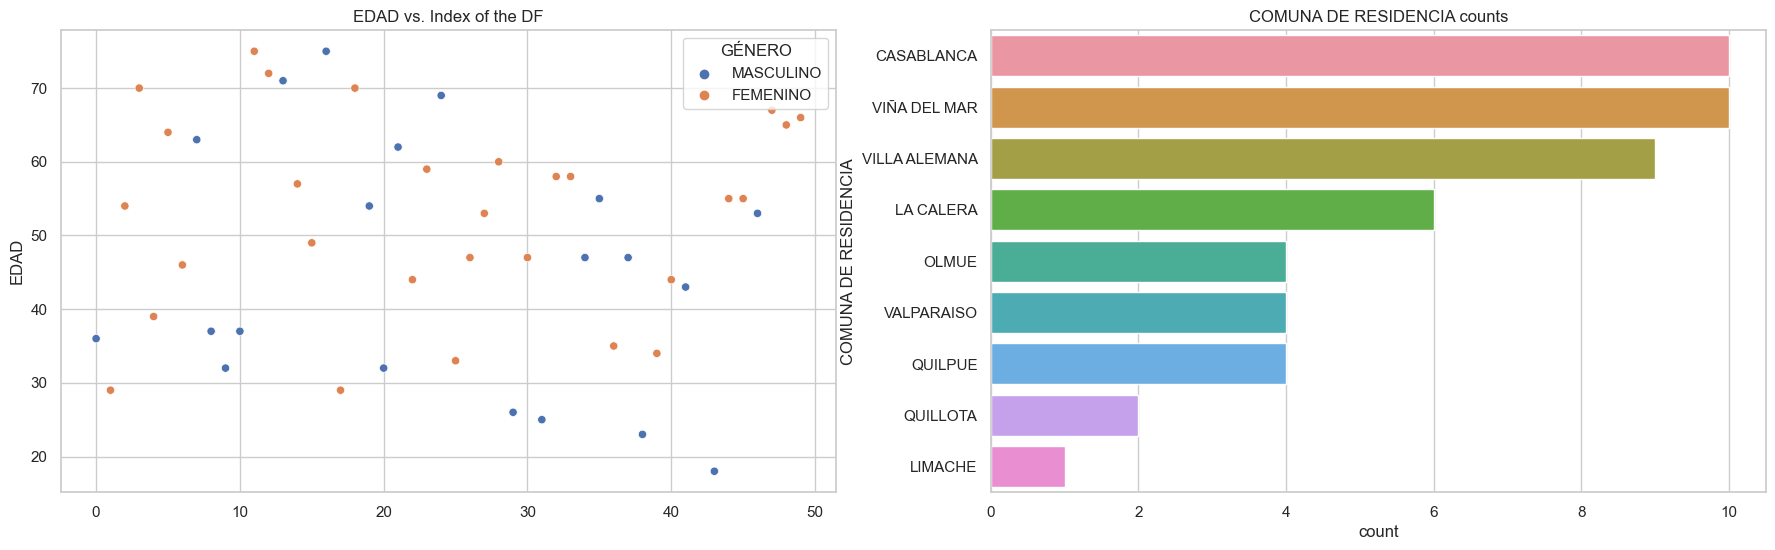

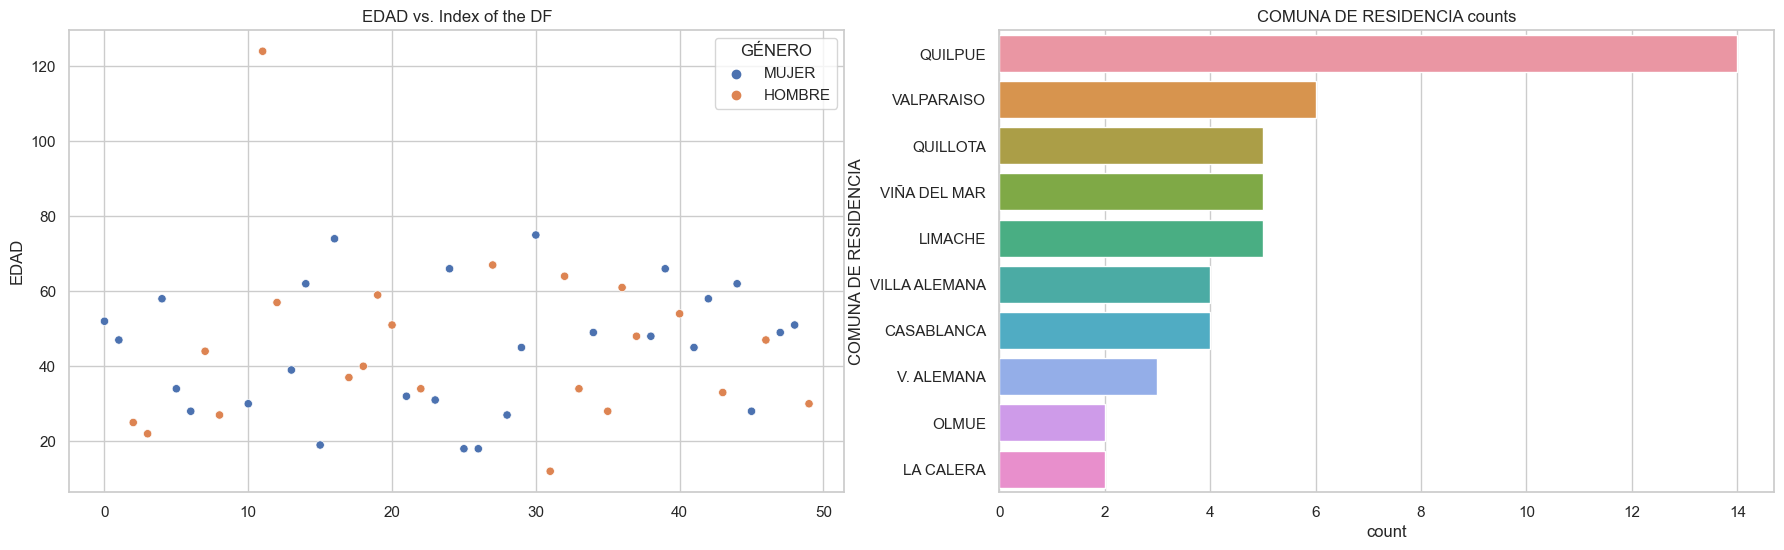

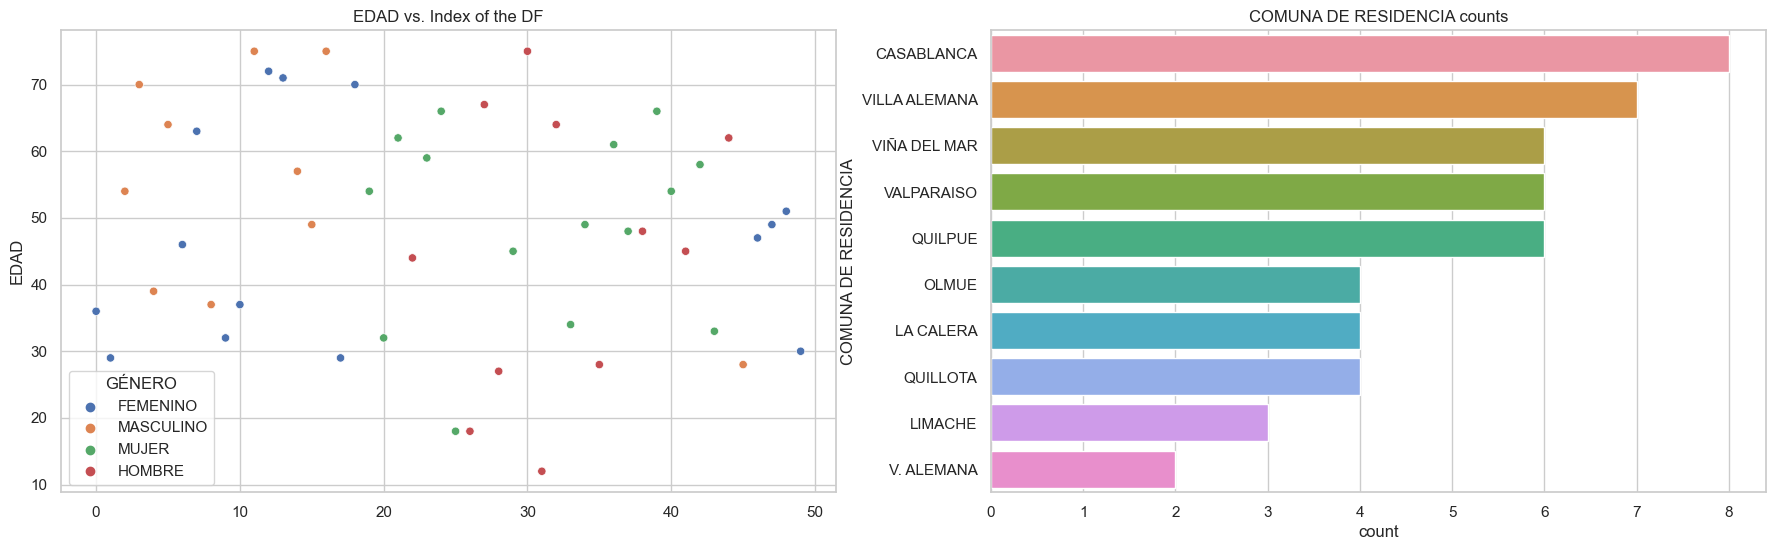

In [461]:
graph_df(df_set_1, "EDAD", "COMUNA DE RESIDENCIA")
graph_df(df_set_2, "EDAD", "COMUNA DE RESIDENCIA")
graph_df(df_set_3, "EDAD", "COMUNA DE RESIDENCIA")

In [462]:
def calculate_stats(df, nombre_df):
    # revisar cuantos datos faltan por columna
    print(f"Número de datos nulos por atributo de {nombre_df}: \n")
    print(df.isnull().sum(axis = 0).sort_values(ascending=False))

    print()

    print("Cantidad de valores distintos por columna: \n")
    print(df.nunique().sort_values(ascending=False))

    print("Moda por columna: \n")

    modas_por_columna = {}

    for columna in df.columns:
        modas = df[columna].mode()
        modas_por_columna[columna] = list(modas) if not modas.empty else None

    print("Modas por columna:")
    print(modas_por_columna)
    print("\n\n")

calculate_stats(df_set_1, 'Set de Datos 1')
calculate_stats(df_set_2, 'Set de Datos 2')
calculate_stats(df_set_3, 'Set de Datos 3')

Número de datos nulos por atributo de Set de Datos 1: 

EDAD                    1
ACTIVIDAD               1
MARCA                   1
CANTIDAD DIAS           1
GÉNERO                  0
COMUNA DE RESIDENCIA    0
MODELO                  0
KILOMETRAJE INICIAL     0
KILOMETRAJE FINAL       0
MONTO                   0
dtype: int64

Cantidad de valores distintos por columna: 

KILOMETRAJE INICIAL     50
KILOMETRAJE FINAL       50
EDAD                    35
MODELO                  19
MONTO                   15
MARCA                   12
COMUNA DE RESIDENCIA     9
CANTIDAD DIAS            5
ACTIVIDAD                3
GÉNERO                   2
dtype: int64
Moda por columna: 

Modas por columna:
{'EDAD': [47.0], 'GÉNERO': ['FEMENINO'], 'ACTIVIDAD': ['DEPENDIENTE'], 'COMUNA DE RESIDENCIA': ['CASABLANCA', 'VIÑA DEL MAR'], 'MARCA': ['HYUNDAY'], 'MODELO': ['ACCENT', 'SORENTO'], 'KILOMETRAJE INICIAL': [2197, 2200, 2220, 2233, 2329, 2344, 2417, 2471, 2542, 2732, 2736, 2749, 2751, 2829, 2832, 2855, 2

In [463]:
show_df_info(df_set_1)
show_df_info(df_set_2)
show_df_info(df_set_3)

,EDAD,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,49.000000,50.000000,50.000000,49.000000,5.000000e+01
mean,49.775510,3216.580000,3342.980000,2.530612,2.912060e+05
std,15.260605,590.127938,579.413197,1.385972,1.690145e+06
min,18.000000,2197.000000,2318.000000,1.000000,-2.000000e+04
25%,37.000000,2770.500000,2871.250000,1.000000,2.000000e+04
50%,53.000000,3200.500000,3333.000000,2.000000,4.500000e+04
75%,62.000000,3645.750000,3774.500000,4.000000,8.000000e+04
max,75.000000,4201.000000,4305.000000,5.000000,1.200000e+07


,EDAD,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,45.600000,3132.560000,3239.000000,2.940000,62400.000000
std,19.822683,636.723378,647.680634,1.503873,49551.457484
min,12.000000,2172.000000,2221.000000,1.000000,0.000000
25%,30.250000,2637.750000,2737.250000,2.000000,20000.000000
50%,46.000000,3082.500000,3151.000000,3.000000,40000.000000
75%,58.000000,3706.500000,3801.000000,4.000000,100000.000000
max,124.000000,4213.000000,4305.000000,5.000000,150000.000000


,EDAD,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,48.780000,3176.980000,3291.080000,2.840000,9.540200e+04
std,16.770102,522.549226,525.526474,1.503194,2.506898e+05
min,12.000000,2258.000000,2358.000000,1.000000,-2.000000e+04
25%,34.500000,2791.250000,2924.000000,1.000000,2.000000e+04
50%,49.000000,3195.000000,3266.000000,3.000000,5.000000e+04
75%,62.750000,3624.250000,3745.250000,4.000000,9.000000e+04
max,75.000000,4146.000000,4262.000000,5.000000,1.800000e+06


In [464]:
def remove_outliers(df):
    column_number = df.select_dtypes(include=[np.number])

    Q1 = column_number.quantile(0.25)
    Q3 = column_number.quantile(0.75)
    IQR = Q3 - Q1

    return df[~((column_number < (Q1 - 1.5 * IQR)) | (column_number > (Q3 + 1.5 * IQR))).any(axis=1)]

def clean_nan(df):
    # Clean nan values from columns of the df
    df = df.dropna(axis=0, how='any', subset=None, inplace=False)
    return df

def clean_and_join_datasets(df_list):
    # unimos los datasets en 1
    df_concat = pd.concat(df_list, axis=0, ignore_index=True)
    
    df_concat = clean_nan(df_concat)

    # unificamos en un solo genero
    df_concat['GÉNERO'] = df_concat['GÉNERO'].replace({'HOMBRE': 'MASCULINO', 'MUJER': 'FEMENINO'})

    # removemos filas que tienen outliers
    df_final = remove_outliers(df_concat)


    return df_final

df_list = [df_set_1, df_set_2, df_set_3]

df_final = clean_and_join_datasets(df_list)
df_final = transf_datos(df_final)

# Reset index of df_final

df_final.reset_index(drop=True, inplace=True)

display(df_final)

# Convert df_final to xlsx

df_final.to_excel("df_final.xlsx")

,EDAD,GÉNERO,enc_genero,ACTIVIDAD,enc_act,COMUNA DE RESIDENCIA,enc_comuna,MARCA,enc_marca,MODELO,enc_modelo,KILOMETRAJE INICIAL,KILOMETRAJE FINAL,CANTIDAD DIAS,MONTO
0,36.0,MASCULINO,1,ESTUDIANTE,2,QUILLOTA,4,SUBARU,10,XV,21,2732,2866,4.0,80000
1,29.0,FEMENINO,0,DEPENDIENTE,0,VILLA ALEMANA,8,CITROEN,1,BERLINGO,4,2471,2637,3.0,30000
2,54.0,FEMENINO,0,DEPENDIENTE,0,CASABLANCA,0,FIAT,2,FULLBACK,14,3903,4092,4.0,80000
3,70.0,FEMENINO,0,DEPENDIENTE,0,OLMUE,3,HYUNDAY,4,SANTA FE,18,4196,4253,3.0,60000
4,39.0,FEMENINO,0,DEPENDIENTE,0,VALPARAISO,7,HYUNDAY,4,ACCENT,3,3113,3318,5.0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,28.0,MASCULINO,1,ESTUDIANTE,2,QUILLOTA,4,SUBARU,10,XV,21,3070,3142,4.0,80000
131,47.0,FEMENINO,0,DEPENDIENTE,0,VILLA ALEMANA,8,CITROEN,1,BERLINGO,4,3650,3719,3.0,30000
132,49.0,FEMENINO,0,DEPENDIENTE,0,CASABLANCA,0,FIAT,2,FULLBACK,14,2258,2425,4.0,80000
133,51.0,FEMENINO,0,DEPENDIENTE,0,OLMUE,3,HYUNDAY,4,SANTA FE,18,3728,3754,3.0,60000
